# 2. Praxisteil Preprocessing

Der Datensatz besteht aus 2 Teilen die zusammengehören.

Führe das Data PreProcessing und eine explorative Datenanalyse durch.

Welche Erkenntnisse können aus dem Datensatz gewonnen werden?

Verwende dabei verschiedene Plots.

Konzentriere dich auf ein Thema welches du analysieren möchtest. Bei den Plots reichen 3 aus. Diese sollen auf einen Blick das Thema verdeutlichen. Hier zählt Qualität statt Quantität!

Vergiss nicht die Erkenntnisse aus deinen Plots zu notieren.

Thema des Datensatz ist crowdfunding. Hierbei handelt es sich um eine Finanzierungsform bei der verschiedene Investoren unterschiedliche Geldbeträge für bestimmte Projekte geben. Es ist also eine zweckgebunde Finanzierung. Alle Projekte sind abgeschlossene Projekte!


Der gesplittete Datensatz enthält folgende Spalten (inkl. Bedeutung):

    - funded_amount ... mit Ablauf der Crowdfundingzeit erhaltener Betrag in USD
    - loan_amount ... Zielbetrag (Betrag dem man mit Funding erreichen wollte) in USD
    - activity ... Unterkategory zu dem das Ziel des Crowdfunding thematisch gehört
    - sector ... Oberkategory in den das Crowdfunding Thema fällt
    - use ... Kurzbeschreibung wofür das Geld verwendet werden soll
    - country_code ... Ländercode nach ISO Norm
    - country ... Ländername nach ISO Norm
    - region ... Region
    - currency ... Währung in den der funded_amount dann ausgezahlt wurde
    - term in months ... Dauer über die der Kredit ausgezahlt wurde
    - lender_count ...Darlehensgeber (also wieviele Personen Geld für das Projekt gegeben haben)
    - borrower_genders ... Geschlecht und Anzahl der Darlehensnehmer, also diejenigen die das
    Crowdfundingprojekt initiiert haben
    - repayment interval ... Rückzahlungsmodalitäten/-rhythmus

In [1]:
# Import der benötigten Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datensatz einlesen
Datensatz einlesen und zusammenführen

In [2]:
# Trennzeichen herausfinden und Datensatz anschauen
#!type './part1.csv' #Sollte unter Windows funktionieren --> nicht getestet

#Unter Linux
!head './part1.csv'

In [3]:
#!type './part2.csv' #Sollte unter Windows funktionieren --> nicht getestet

#Unter Linux
!head './part2.csv'

Teil 1 hat als Trennzeichen ","<br>
Teil 2 hat als Trennzeichen "#"

In [4]:
# Einlesen Teil 1
df_crowd_raw1 = pd.read_csv('./part1.csv')

#Einlesen Teil 2
df_crowd_raw2 = pd.read_csv('./part2.csv', sep='#')

In [5]:
#Hat funktioniert?
df_crowd_raw1.head(3)

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet


In [6]:
df_crowd_raw1.tail(3)

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
334997,334997,925.0,925.0,Cattle,Agriculture,to increase his herd to get more milk and prov...,TJ,Tajikistan,Khuroson,TJS,14.0,28,male,monthly
334998,334998,175.0,175.0,General Store,Retail,"to buy additional items to sell, like beverage...",PH,Philippines,"Palo, Leyte",PHP,8.0,6,female,irregular
334999,334999,150.0,150.0,Food Production/Sales,Food,to buy sticky rice and sugar.,PH,Philippines,"Jagna, Bohol",PHP,8.0,5,female,irregular


In [7]:
df_crowd_raw2.head(3)

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,175.0,175.0,Liquor Store / Off-License,Food,to purchase additional stock of coconut wine t...,PH,Philippines,"Palo, Leyte",PHP,8.0,6,female,irregular
1,1,325.0,325.0,Livestock,Agriculture,to buy 3 zebus and food to fatten them up.,MG,Madagascar,Antsirabe,MGA,12.0,13,female,monthly
2,2,550.0,550.0,Food Stall,Food,to buy ingredients for her food-vending busine...,PH,Philippines,"Cordova, Cebu",PHP,5.0,6,female,irregular


In [8]:
df_crowd_raw2.tail(3)

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
336202,336202,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
336203,336203,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,0,female,monthly
336204,336204,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,0,female,monthly


- Beide Teile wurden eingelesen
- Datensätze haben gleiche Spalten --> können Reihenweise über concat zusammengeführt werden
- Spalte Unnamed: 0 kommt vom einlesen der csv. Dateien gibt nur den Index wieder --> keine Information
- In Spalte use gibt es fehlende Werte und Text in [] --> überlegen was damit zu tun ist

In [9]:
# Dataframes zusammenführen, ohne Index zu benutzen, Spalte Unnamed: 0 löschen
df_crowd = pd.concat([df_crowd_raw1, df_crowd_raw2], ignore_index=True)
df_crowd.drop(columns=["Unnamed: 0"], inplace=True)

In [10]:
df_crowd.head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet


In [11]:
df_crowd.tail(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
671202,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,0,female,monthly
671204,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,0,female,monthly


- Hat funktioniert

## Erste Inspektion der Spalten und Speicherplatz

In [12]:
df_crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       671205 non-null  float64
 1   loan_amount         671205 non-null  float64
 2   activity            671205 non-null  object 
 3   sector              671205 non-null  object 
 4   use                 666973 non-null  object 
 5   country_code        671197 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  borrower_genders    666984 non-null  object 
 12  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 66.6+ MB


- "use", "country_code", "region", "borrower_genders" haben NULL-Werte nach Konvention
- "use" ist Freitext --> Text Mining notwendig
- "region" könnte interessant sein für einen genaueren Blick auf ein Land
    - Fehlende Werte in der Spalte müssen dann bleiben
- "activity" erlaubt genaueren Blick auf die einzelen Sektoren
    - Eventuell aber zuviel
- "repayment_interval"
    - hängt funded_amount von repayment Intervall ab
    - repayment interval abhängig vom Land?
    - repayment interval abhängig von den Borrowers?
- Der Datensatz hat eine Größe von > 66mb mit mehr als 670000 Einträgen
    - Spalten "funded_amount", "loan_amount" und "term_in_months sind float können in Integer umgewandelt werden um den Datensatz zu verkleinern
    - Spalte Currency ist nicht von Interesse, Information inhärent in country vorhanden
    - Spalte country_code behalten, für darstellen in einer Karte
    - Spalte repayment_interval wird behalten --> Mögliche zusammenhänge

In [13]:
#Spalte "term_in_months" in int umwandeln
df_crowd["term_in_months"] = df_crowd["term_in_months"].astype(int)

#Spalte "loan_amount" in int umwandeln
df_crowd["loan_amount"] = df_crowd["loan_amount"].astype(int)

#Spalte "funded_amount" in int umwandeln
df_crowd["funded_amount"] = df_crowd["funded_amount"].astype(int)

#Spalte "currency löschen"
df_crowd.drop(columns=["currency"], inplace=True)

In [14]:
#Check ob alles funktioniert hat
df_crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   funded_amount       671205 non-null  int64 
 1   loan_amount         671205 non-null  int64 
 2   activity            671205 non-null  object
 3   sector              671205 non-null  object
 4   use                 666973 non-null  object
 5   country_code        671197 non-null  object
 6   country             671205 non-null  object
 7   region              614405 non-null  object
 8   term_in_months      671205 non-null  int64 
 9   lender_count        671205 non-null  int64 
 10  borrower_genders    666984 non-null  object
 11  repayment_interval  671205 non-null  object
dtypes: int64(4), object(8)
memory usage: 61.5+ MB


Hat funktioniert Speicherverbrauch um 5Mb gesunken

## Fehlende Werte
### Synonyme

In [15]:
#Mit Liste schauen welche Spalten Synonyme enhalten die zu ersetzen sind.
missing_list = ['?', ' ', '', '-', 'dummy', 'dummy-must-be-changed', "missing", "missing_value", "unknown"]
df_crowd.isin(missing_list).sum()

funded_amount         0
loan_amount           0
activity              0
sector                0
use                   1
country_code          0
country               0
region                0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
dtype: int64

In Spalte "use" kommt ein Synonym vor

In [16]:
df_crowd.loc[df_crowd["use"].isin(missing_list)]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval
121644,1350,1350,Fish Selling,Food,,CO,Colombia,Soledad Atlàntico,14,54,female,monthly


Was wir damit machen entscheidet sich nach der Suche von Konventionen

### Konventionen

In [17]:
#Nach Konventionen schauen
df_crowd.isnull().sum()

funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country_code              8
country                   0
region                56800
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
dtype: int64

### Behandlung der Werte

- Spalten "use", "region" und "borrower_genders", "country_code" haben fehlende Werte
    - Die Informationen von "use" sind in den Spalten "sector" und "activity" beinhaltet
        - --> "use" könnte gelöscht werden (keine Zeit für Textanalyse). Ich lasse die Werte drin und ändere sie in einen leeren String um bei interessanten Projekten weitere Informationen zu haben
    - In Spalte "borrower_genders" genauer nachschauen
        - Betriftt wieviel Prozent der Einträge?
        - Bei weniger als 1% können Werte gelöscht werden ohne Einfluss auf die Statistik zu haben
    - Informationen aus "region" sind in "country" beinhaltet
        - für Analyse einzelner Länder von Interesse
        - Betrifft wieviel Prozent der Einträge?
    - country code ist in country beinhaltet, aber nützlich für weitere Auswertung
        - Welche Länder, wie ersetzen?

In [18]:
#Fehlende Werte in "use" durch leeren String ersetzen
df_crowd["use"].replace({np.nan: ""}, inplace=True)
df_crowd["use"].isnull().sum()

0

In [19]:
#Wie viel Prozent der Einträge in Region betroffen?
df_crowd["region"].isnull().sum() / len(df_crowd["region"]) *100

8.46239226465834

Es sind 8.46% der Einträge betroffen --> Spalte behalten um später Länder nach Regionen auswerten zu können

In [20]:
#Wie viel Prozent der Einträge in borrower_gender sind betroffen
df_crowd["borrower_genders"].isnull().sum() / len(df_crowd["borrower_genders"]) *100

0.6288689744563881

Es sind weniger als 1% der Daten betroffen --> die Einträge können gelöscht werden

In [21]:
#Nur Zeilen in Dataframe belassen bei denen "borrower_genders" nicht NULL ist
df_crowd = df_crowd.loc[~df_crowd["borrower_genders"].isnull()]

#Index neu machen
df_crowd.reset_index(inplace=True, drop=True)

#Überprüfen ob geklappt
print(df_crowd.isnull().sum())
df_crowd.head(3)

funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                       0
country_code              8
country                   0
region                52579
term_in_months            0
lender_count              0
borrower_genders          0
repayment_interval        0
dtype: int64


,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval
0,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,12,12,female,irregular
1,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,11,14,"female, female",irregular
2,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,43,6,female,bullet


In [22]:
#fehlende Werte in country_code anschauen
df_crowd.loc[df_crowd["country_code"].isnull()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval
199747,4150,4150,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,6,162,female,bullet
200031,4150,4150,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,6,159,male,bullet
341192,3325,3325,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,7,120,female,bullet
347422,3325,3325,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,7,126,male,bullet
417041,3325,3325,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,7,118,female,bullet
417306,4000,4000,Wholesale,Wholesale,purchase solar lighting products for sale to l...,NaN,Namibia,Rundu,7,150,male,bullet
483202,5100,5100,Renewable Energy Products,Retail,to pay for stock of solar lights and cell phon...,NaN,Namibia,Katima Mulilo,7,183,male,bullet
483647,5000,5000,Wholesale,Wholesale,to maintain a stock of solar lights and cell p...,NaN,Namibia,Oshakati,7,183,female,bullet


Scheint nur Namibia zu betreffen

In [23]:
#Checken ob das stimmt
df_crowd.loc[(df_crowd["country_code"].isnull()) & (df_crowd["country"] != "Namibia")]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval


In [24]:
#Hat Namibia noch andere country codes?
df_crowd.loc[(~df_crowd["country_code"].isnull()) & (df_crowd["country"] == "Namibia")]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval


Namibia als country_code ist schwierig. Werte ersetzen durch "NA" (aus https://de.wikipedia.org/wiki/ISO-3166-1-Kodierliste)

In [25]:
#Werte ersetzen nicht mit Replace um sicherzugehen, dass wir wirklich nur Namibia ersetzen
df_crowd.loc[df_crowd["country"] == "Namibia", "country_code"] = 'NA'
df_crowd.loc[df_crowd["country"] == "Namibia"]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval
199747,4150,4150,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NA,Namibia,EEnhana,6,162,female,bullet
200031,4150,4150,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NA,Namibia,Rundu,6,159,male,bullet
341192,3325,3325,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NA,Namibia,EEnhana,7,120,female,bullet
347422,3325,3325,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NA,Namibia,Rundu,7,126,male,bullet
417041,3325,3325,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NA,Namibia,EEnhana,7,118,female,bullet
417306,4000,4000,Wholesale,Wholesale,purchase solar lighting products for sale to l...,NA,Namibia,Rundu,7,150,male,bullet
483202,5100,5100,Renewable Energy Products,Retail,to pay for stock of solar lights and cell phon...,NA,Namibia,Katima Mulilo,7,183,male,bullet
483647,5000,5000,Wholesale,Wholesale,to maintain a stock of solar lights and cell p...,NA,Namibia,Oshakati,7,183,female,bullet


In [26]:
#Wird nicht mehr als NULL betrachtet?
df_crowd["country_code"].isnull().sum()

0

## Inspektion / Pairplot

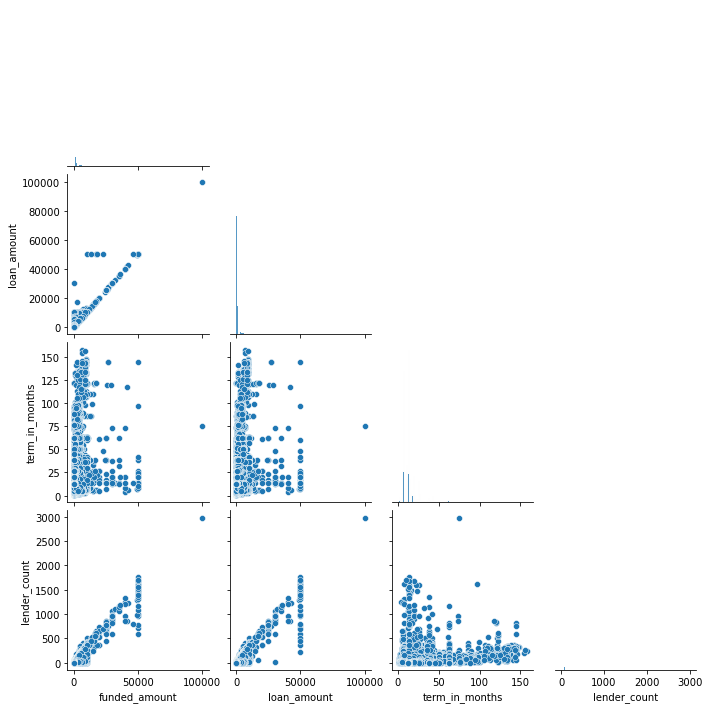

In [27]:
#Pairplot
sns.pairplot(df_crowd, corner=True, vars=["funded_amount", "loan_amount", "term_in_months", "lender_count"])

- funded_amount und loan_amount haben linearen Zusammenhang
    - hier sind gerade die Fälle interessant bei denen das nicht zutrifft (mehr Geld bekommen als den Zielwert)
- loan_amount und funded_amount haben einen Ausreißer
    - was für ein Projekt ist das?
- Loan_amount und funded_amount haben eine quasi Barriere bei 50000 USD außer den Ausreißer gibt es dort keine größeren Werte
- lender_count hat einen Ausreißer mit ~3000
    - Ausreißer oder cooles Projekt?
- Ausreißer macht Plot schwer zu interpretieren

In [28]:
#Per Describe Statistik machen
df_crowd.describe()

,funded_amount,loan_amount,term_in_months,lender_count
count,666984.000000,666984.000000,666984.000000,666984.000000
mean,785.127844,840.300742,13.730235,20.550875
std,1127.999928,1187.909500,8.596158,28.366197
min,0.000000,25.000000,1.000000,0.000000
25%,250.000000,275.000000,8.000000,7.000000
50%,450.000000,500.000000,13.000000,13.000000
75%,900.000000,1000.000000,14.000000,24.000000
max,100000.000000,100000.000000,158.000000,2986.000000


- Projekte mit max funded und loan amount anschauen
- Projekt mit 2986 lender_count anschauen
- mean und median funded_amount sind kleiner als mean und median loan_amount
    - Welche Projekte haben ihre Funding Ziele erreichen?
    - Welche Projekte haben ihre Funding Ziele nicht erreicht?
    - Welche Projekte haben ihre Funding Ziele übertroffen?
- Projekte mit funded_amount 0
- Projekte mit lender_count 0

## Ausreißer

In [29]:
# Projekt mit den maximalen Werten bei Loan Amount und Funded Amount anschauen
df_crowd.sort_values(by="funded_amount", ascending=False)[0:5]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval
69540,100000,100000,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,75,2986,female,irregular
490440,50000,50000,Agriculture,Agriculture,To pay smallholder coffee farmers in rural Ken...,KE,Kenya,Nairobi,15,1441,female,irregular
536928,50000,50000,Goods Distribution,Wholesale,to bolster logistics of affordable water distr...,HT,Haiti,Petion-Ville,14,1349,male,irregular
161412,50000,50000,Agriculture,Agriculture,to fund its growing loan book and further deve...,KE,Kenya,Nairobi,38,1343,female,bullet
610689,50000,50000,Furniture Making,Manufacturing,create jobs through environmentally-friendly m...,KE,Kenya,Nairobi,20,1094,male,irregular


- Großes Projekt, Schaffung von mehr als 300 Arbeitsplätzen
- Funded, loan amount und lender_count deutlich höher als bei anderen
- Für Statistiken auschließen
- Für generelle Auswertung bleibt Projekt drin

In [30]:
# Projekt bei denen kein Geld gebenen wurde Funded Amount = 0
df_crowd.loc[df_crowd["funded_amount"] == 0][0:5]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval
4760,0,5000,Food Production/Sales,Food,grow and create new jobs in my company.,US,United States,NaN,24,0,female,bullet
6710,0,10000,Cosmetics Sales,Retail,start a new stream of income by offering retai...,US,United States,NaN,36,0,male,bullet
10620,0,5000,Services,Services,purchase new equipment and market to more pote...,US,United States,NaN,24,0,male,bullet
11910,0,5000,Food Production/Sales,Food,purchase much needed packaging that is sustain...,US,United States,NaN,24,0,male,bullet
13400,0,1500,Crafts,Arts,"increase my inventory of handmade candles, dri...",US,United States,NaN,12,0,male,bullet


In [31]:
#Wie viele von diesen Projekten gibt es?
len(df_crowd.loc[df_crowd["funded_amount"] == 0])

3254

- Projekte die keine Geldgeber gefunden haben
- Keine Ausreißer im eigentlich Sinn --> bleiben im Datensatz
- Check machen ob es Projekte mit Geld gibt bei denen kein Geldgeber eingetragen wurde und umgekehrt

In [32]:
#Projekte mit Geld gibt bei denen kein Geldgeber eingetragen wurde umgekehrt
df_crowd.loc[((df_crowd["funded_amount"] == 0) & (df_crowd["lender_count"] != 0)) |
            ((df_crowd["funded_amount"] != 0) & (df_crowd["lender_count"] == 0))]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval


Gut die Daten sind konsistent

## Features

In [33]:
df_crowd.head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval
0,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,12,12,female,irregular
1,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,11,14,"female, female",irregular
2,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,43,6,female,bullet


- Neue Spalte: goal_reached:
    - reached: funded_amount == loan_amount
    - not reached: funded_amount < loan_amount
    - no funding funded_amount == 0
    - exceeded: funded_amount > loan_amount
- Neue Spalte: borrowers_female und borrowers_male:
    - Anzahl der Leute die das Projekt gestartet haben
    - Getrennt nach Geschlecht
    - Summe kann genutzt werden für Gesamtzahl Projektstarter
- Spalte borrower_genders ändern:
    - Geschlecht der Leute die das Projekt gestartet haben
    - Nur Male --> Male
    - Nur Female --> Female
    - Beides --> Mixed

### goal_reached

In [34]:
#Neue leere Spalte erstellen
df_crowd["goal_reached"] = ''

#Funding erfolreich
df_crowd.loc[df_crowd["funded_amount"] == df_crowd["loan_amount"], "goal_reached"] = "reached"

#Nicht erfolgreich
df_crowd.loc[df_crowd["funded_amount"] < df_crowd["loan_amount"], "goal_reached"] = "not reached"

#Kein Geld bekommen
df_crowd.loc[df_crowd["funded_amount"] == 0, "goal_reached"] = "no funding"

#Ziel übertroffen
df_crowd.loc[df_crowd["funded_amount"] > df_crowd["loan_amount"], "goal_reached"] = "exceeded"

In [35]:
#Hat geklappt?
df_crowd

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval,goal_reached
0,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,12,12,female,irregular,reached
1,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,11,14,"female, female",irregular,reached
2,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,43,6,female,bullet,reached
3,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,11,8,female,irregular,reached
4,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,14,16,female,monthly,reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666979,0,25,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,13,0,female,monthly,no funding
666980,0,25,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,13,0,female,monthly,no funding
666981,25,25,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,13,1,female,monthly,reached
666982,0,25,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,13,0,female,monthly,no funding


### borrower_male / borrower_female und borrower_genders

In [36]:
#Anzahl Projektstarter "borrower_count" aus Spalte "borrower_genders" holen

#Echte Kopie der Spalte borrower_genders erstellen
genders = df_crowd["borrower_genders"].copy()

#String aufteilen an ',' --> wird zu Liste
genders = genders.str.split(', ')

#Leere Listen erstellen und über genders Liste iterieren
borrower_female = []
borrower_male = []
borrower_genders = []

for gender in genders:
    #Einträge Männlich / Weiblich zählen
    f = gender.count("female")
    m = gender.count("male")
    
    #Einträge an Listen anhängen
    borrower_female.append(f)
    borrower_male.append(m)
    
    #Schauen ob Gruppe männlich / weiblich oder mixed ist
    if (f > 0) and (m > 0):
        borrower_genders.append("mixed")
    elif (f == 0) and (m > 0):
        borrower_genders.append("male")
    elif (f > 0) and (m == 0):
        borrower_genders.append("female")
    else:
        #Falls Eintrag fehlen sollte --> nachher überprüfen
        borrower_genders.append("")

        #Listen in Dataframe einfügen        
df_crowd["borrower_genders"] = borrower_genders
df_crowd["borrower_female"] = borrower_female
df_crowd["borrower_male"] = borrower_male

Test ob funktioniert

In [37]:
df_crowd.head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval,goal_reached,borrower_female,borrower_male
0,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,12,12,female,irregular,reached,1,0
1,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,11,14,female,irregular,reached,2,0
2,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,43,6,female,bullet,reached,1,0


Test ob es funktioniert hat und auch alle Geschlechtergruppen vertreten sind

In [38]:
df_crowd["borrower_genders"].unique()

array(['female', 'male', 'mixed'], dtype=object)

In [39]:
df_crowd.loc[df_crowd["borrower_genders"] == 'mixed'][0:2]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval,goal_reached,borrower_female,borrower_male
59,3175,3175,Home Products Sales,Retail,to buy fabric to sell and materials to make be...,TZ,Tanzania,Dar es Salaam,8,114,mixed,irregular,reached,3,1
88,5475,5475,Retail,Retail,to buy food stock and sacks of charcoal to use...,TZ,Tanzania,Dar es Salaam,9,169,mixed,irregular,reached,12,1


In [40]:
df_crowd.loc[df_crowd["borrower_genders"] == 'male'][0:2]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval,goal_reached,borrower_female,borrower_male
49,450,450,General Store,Retail,to stock his store.,SV,El Salvador,NaN,14,18,male,monthly,reached,0,1
50,3175,3175,Butcher Shop,Food,to buy meat and also to start selling fish in ...,TZ,Tanzania,Dar es Salaam,10,93,male,monthly,reached,0,5


## Datei exportieren
Datei nach csv exportieren um bei der Visualisierung in Ruhe weitermachen zu können

In [41]:
#Nach CSV exportieren
df_crowd.to_csv('./crowdfunding_after_preprocessing.csv')
#Hat funktioniert?
!head './crowdfunding_after_preprocessing.csv'

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval,goal_reached,borrower_female,borrower_male
0,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell. ",PK,Pakistan,Lahore,12,12,female,irregular,reached,1,0
1,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used in their business.,PK,Pakistan,Lahore,11,14,female,irregular,reached,2,0
2,150,150,Transportation,Transportation,To repair their old cycle-van and buy another one to rent out as a source of income,IN,India,Maynaguri,43,6,female,bullet,reached,1,0
3,200,200,Embroidery,Arts,to purchase an embroidery machine and a variety of new embroidery materials.,PK,Pakistan,Lahore,11,8,female,irregular,reached,1,0
4,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,14,16,female,monthly,reached,1,0
5,250,250,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,,4,6,fem